# CSCI4022 Homework 1; Review

## Due Monday, Sept. 9 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Problem 1 (Bayes; 10 points)

Nationally, 1 in 10000 people have a specific rare disease. Suppose a test for the disease is administered such the probability that a person with the disease returns a positive test is *100%*.  The probability that a person without the disease returns a positive test is .02.
 - What is the probability that a person tests positive?
 - What is the probability that a person has the disease *given* they test positive?
 
Use the following markdown cell to show all work in computing the exact answer.

## Problem 2 (Numerics... kind of; 15 points)

####  a) Solve for $b$ in the matrix-vector product $$\begin{bmatrix}a_1 & a_2 \\ a_3 & a_4\end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\end{bmatrix}=b.$$

####  How many computations does this take, if each multiplication and addition is counted as a separate computation?  

 #### What about for

$$\begin{bmatrix}a_1 & a_2 &a_3 \\ a_4 & a_5 &a_6 \\ a_7&a_8&a_9 \end{bmatrix} \cdot \begin{bmatrix}x_1\\ x_2\\x_3\end{bmatrix}=b?$$

Use the following markdown cell to show all work in computing the exact answer.



####  b) How many computations does matrix-vector computation take if the matrix $A$ is a square $n \times n$ matrix and the vector $x$ is $n \times 1$? 

Visually:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix}  \cdot \begin{bmatrix}x_1\\ \vdots \\x_n\end{bmatrix}=b$$

Use the following markdown cell to show all work in computing the exact answer.


#### c) How many computations does square matrix-matrix multiplication take if each matrix is $n \times n$? 

For example:

$$\begin{bmatrix} 
    a_{11} & a_{12} & \dots \\
    \vdots & \ddots & \\
    a_{n1} &        & a_{nn} 
    \end{bmatrix} \cdot 
    \begin{bmatrix} 
    b_{11} & b_{12} & \dots \\
    \vdots & \ddots & \\
    b_{n1} &        & b_{nn} 
    \end{bmatrix}=C$$
    
Hint: how many computations for the entry $c_{ij}$ in row $i$, column $j$?

If $n=10^4$, what number is this?

## Problem 3 (EDA, SLR; 20 points)

NOAA's Physical Sciences division (https://www.esrl.noaa.gov/psd) houses an enormous amount of weather data.  Load `hw1BoulderPPT.csv` from the course page for the last 100 years of monthly precipitation data from Boulder.

#### a) When the amount of precipitation was nonzero but too small to be recorded, this data set recorded `tr`.  Replace these with zeroes.

#### b) Generate a series of 12 box plots with month as the x axis and precipitation on the y-axis.


#### c) Atmospheric scientists love to group months seasonally, breaking the year into a Winter season including December, January, February; a Spring included March, April, and May; and so forth. Generate a series of 4 box plots with season as the x axis and precipitation on the y-axis.



#### d) Calculute the mean and standard deviation of the September precipitation in this set.  Suppose monthly precipitation in September is normally distributed with this mean and standard deviation.  If this is true, what is the associated probability of observing `18.16 inches`  of rainfall in any given September, as occurs in 2013?  Explain.

In [ ]:
#code cell; use markdown cell after this for explanation.

#### e) Following the distribution in part d); what is the associated probability of observing `18.16 inches`  of rainfall in *any* September of 100 observed, assuming each year is independent?  Explain.

In [ ]:
#code cell; use markdown cell after this for explanation.

#### f) Construct a linear model to determine whether year is a significant predictor of annual precipitation.  Is there evidence to suggest that precipitation in Boulder has changed over time?  Include a plot of the residuals of your model over time.  Is there evidence to suggest that each year may not be independent of the prior year?

In [ ]:
#code cell; use markdown cell after this for explanation.

## Problem 4 (Hypothesis Simulation; 15 points)


One question we will often be tasked with in the semester is asking what "random" looks like.  In hypothesis testing, we typically ask "what is the probability of observing *this* test statistic if everything is fair/random."  We can then do so for a variety of test statistics (`Z`, `T`, proportions, sample variances, etc.) to draw conclusions like "That doesn't look random!  It's extremely unlikely to happen under the **null hypothesis**, so we reject that hypothesis."

As we develop new tools this semester, simulation can help us determine what our tools do if everything is random, which helps provide context to the answers we get on real data - which ideally includes a real signal in it that we want to discover.

## How correlated is really correlated?

The code below simulates from the bivariate normal distribution, which we'll use later this semester.  In brief, it simulates a list of points (called `rnorms` below) as an $j \times 2$ array where each of the `j` rows is an $(x,y)$ point.  We can either simulate these two column vectors $X$ and $Y$ so they're actually independent and the true correlation coefficient $\rho_{xy}=0$ OR we can simulate them with actual correlations included.

We want to know how much correlation is required for us to be able to meaningfully detect it.  Note that our simulated "*sample*" correlation coefficients never actually match the true value!

Example code:

[[1.         0.06116183]
 [0.06116183 1.        ]]
[[1.        0.8671645]
 [0.8671645 1.       ]]


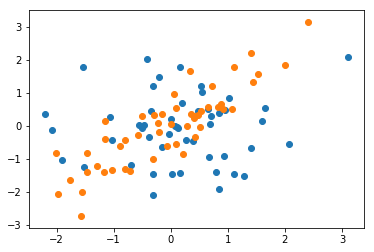

In [11]:
rho=0
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 indepenent N(0,1)
print(np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look uncorrelated?


rho=.8
rnorms=np.random.multivariate_normal([0,0], [[1,rho],[rho,1]],50)  #sample of size j=50 rho=.8 N(0,1)
print(np.corrcoef(rnorms[:,0],y=rnorms[:,1]))
plt.scatter(rnorms[:,0],y=rnorms[:,1]) #sanity check... do they look correlated?


##### a) Our goal is to understand at what point we can actually tell whether or not things are correlated. To this end, let the example code above guide you to code that allows you to:

 - i) Generate a sample of `j=10` bivariate normals (of mean 0, variance 1) that are uncorrelated.  Calculate the correlation of this sample.
 - ii) Repeat step `i` 1000 times.  Save all 1000 correlation coefficients.
 - iii) Repeat steps `i` and `ii` for `j=100` and `j=1000`.  We now have 3000 correlation coefficients across 3 values of `j`.
 


Consider testing the null hypothesis:
  - $H_0:$ These samples are uncorrelated
  
  against the alternative
  
  - $H_a:$ These samples have $\rho_{xy} \ne 0$.
  
#### b) At what sample correlations do we reject the null hypothesis if we set a probability of Type I error equal to .05?

#### c) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=.1$.

#### d) Use additional simulations as in part a) to determine the power of our test in b) when `j=10`, `j=100`, and `j=1000` if the true correlation coefficient is $\rho=-.1$.  Should this differ from part c)?